#  4 Numerical solution of differential equations

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy import linalg                # import library to invert matrices
init_printing()                         # print SymPy results in typeset maths format
plt.rcParams.update({'font.size': 16})  # set font size for plots

## Introduction
Although many differential equations can be explicitly integrated, as illustrated in Chapter 10, there are many others of interest, particularly in quantum mechanics, that have no such solution other than by a series expansion and even this may only be approximate. In these cases a numerical solution must be sought; however, this is always preceded by as much algebraic analysis of the problem as is possible.

As with any integration, a constant is produced for each integration step; two constants are necessary for an equation with derivative $d^2y/dx^2$ because two integrations are necessary to produce $y$. In differential equations, integration constants are found by using the initial values and/or the boundary values to $y$ and its derivatives, and these are determined by the particular problem being solved. These are described in Chapter 10.

## 4.1 Euler's and other methods of numerical approximation

The analytic or algebraic solution to an equation produces a function whose values are continuous in $x,\, y$, or $t$, and that allows us to calculate its value at any point we might choose, there being, effectively, an infinite number to choose from. A general feature of the numerical solution of a differential equation is that it is converted into recursive finite - difference equation and this is because a numerical solution can be obtained only at relatively few discrete values. The general first-order differential equation is

$$\displaystyle \frac{dy}{dt}=f(t,y)  \qquad\tag{16}$$

which means that $f(t, y)$ is a function of $y$ and $t$ such as $te^{-t} + y + 3$. The initial condition is $y(t_0) = y_0$. The differential has to be approximated in some way, because we can only evaluate at discrete points, and the simplest way to do this is to write

$$\displaystyle  \frac{\Delta y}{\Delta t}\approx \frac{dy}{dt}=f(t,y)  \qquad\tag{17}$$

If $\Delta t=t_{n+1}-t_n \equiv h$ is small enough, then this first-order approximation is a good one. The change in $y$ is calculated similarly,

$$\displaystyle  \frac{\Delta y}{\Delta t}= \frac{y_{n+1}-y_n}{h}\approx f(t_n,y_n)  \qquad\tag{18}$$

Rearranging gives the Euler method equations 

$$\displaystyle  y_{n+1}=y_n+hf(t_n,y_n)  \qquad\tag{19a}$$

$$\displaystyle  y_0=y(t_0), \qquad t_n=t_0+nh, \qquad n=0,\,1,\,2\cdots N-1 \qquad\tag{19b}$$

The $n^{th}$ value of $t$ is $t_n = t_0 + nh,\,t_0$ being the initial time when $n = 0$, and the initial condition is $y(t_0)=y_0$ .The times are $t_0,\,t_1 =t_0 +h,\,t_2 =t_0 +2h$, and so forth. The grey area in Fig 7 (left) is $hf(t_n, y_n)$ which approximates the whole area under the curved line in the Euler method.

The calculation is easy to implement, but several terms have to be defined before starting. These are the initial condition, which means $t_0$ and $y(t_0) = y_0$, the final time to stop the calculation $t_{max}$, and the number of points $N$. These will define $h$ as 

$$\displaystyle h= \frac{T_{max}-t_0}{N-1}$$

Choosing $N$ is not difficult; as a rule-of-thumb start with 100 points and see what happens, then repeatedly double or treble this value. Increasing $N$ reduces $h$ and this will often have to be $\ll$ 0.01, but if it is too small, the calculation will take a considerable time to complete and therefore some compromise is always necessary.

Sometimes, the solution of the equation is sought to smaller values than $t_0$, effectively running the calculation backwards, which means making $h$ negative. In this case, the time has to be reduced as $t_n=t_0-nh$ and the consecutive values of y calculated as

$$\displaystyle y_{n+1} = y_n - hf(t_n, y_n) \qquad\tag{20}$$


![Drawing](num-methods-fig7.png)

Fig. 7. The grey area is calculated in the Euler method (left) only very approximately measures the true area under the curve. On the right the improved Euler method is shown and is clearly better. The notation is $f_n \equiv f(t_n,y_n)$. The smaller $h$ becomes the better the curve is approximated.
_______

## 4. 2 Errors

Before carrying out the calculation, the error implicit in this method should be considered. There will always be an error associated with a numerical method because an approximation to the derivative has always to be made. The error takes two forms; the approximation to $dy/dx$ produces a truncation error; a better approximation could be made by expanding this as a series. The truncation errors can be _local_ or _global_, the local error is that produced in a single step, the global is that accumulated after many steps. Generally, a smaller value of $h$ reduces these errors; conversely, too large a value, which may not be realised beforehand, can lead to instability with the solution becoming erratic. Some small amount of experimenting is often required to fix $h$ to an appropriate value. There are complex ways of estimating the errors but, pragmatically, it is simpler to double the number of points repeatedly until no change in the calculated data is observed.

The second form of error is due to rounding. A small value of $h$ leads to many terms being summed, and depending on the particular form of $f(y, t)$ this may or may not be important; only a calculation will reveal this. However, it can mostly be prevented by increasing the precision of the calculation. Most programmes nowadays use double precision floating point arithmetic, but if problems persist this may need to be increased.  How this is done is clearly specific to the language used.

## 4.3 Using Euler' s method

To illustrate the method, the equation 

$$\displaystyle dy/dt = -2e^{3-t} - 3y$$

will be integrated from $t$ = 2 to 7 with initial condition $y(t_0)$ = 1, hence $t_0$ = 2. This equation can be integrated analytically and this allows a check on the algorithm. The solution looks something like a Lennard - Jones  potential between two molecules or Morse potential between two atoms, with a single minimum and tending to infinity at $t$ = 0 and to zero at large $t$. 

The calculation starts by defining the initial values and other constants such as the number of points for the grid over which to do the calculation. Two arrays, Eulery and dtime, are used to store the results and the initial values are placed into the first element of each array. Notice that the values of $y$ and $t$ are both incremented in the for loop which changes $y$ and $t$ for each new step. The function to be integrated is always the right-hand side of the differential equation when written as $dy/dt = \cdots$. In the code the function, dydt, is passed into the subroutine Eulerf, which does the calculation, with the statement $\mathtt{soln0,time0 = Eulerf(dydt,t0,y0,maxt,N)}$ which also returns the answers.

The outline algorithm 9 is

**(1)**$\quad$ Define equation to integrate call this dydt .

**(2)**$\quad$ Set initial parameters,$y_0,\,t_0$,number of integration points, $N$

$\quad$ **(i)**  Calculate $h$

$\quad$ **(ii)**  Save initial values 
   
**(3)**$\quad$ Start loop on $N$ 

$\quad$ **(i)**  Increment $y$ equation (11.19)
   
$\quad$ **(ii)** Increment $t$
   
$\quad$ **(iii)** Save $y$ and $t$
   
$\quad$ **(iv)** end loop

In [2]:
# Algorithm 9: Euler's method
#--------------------------------
def Eulerf(f, t0, y0, maxt, N):            # Euler method, function f 
    
    Eulery = np.zeros(N,dtype=float)    # define arrays to hold results
    dtime  = np.zeros(N,dtype=float)
    h = (maxt - t0)/N
    #print('step size',h)
    
    y = y0
    t = t0
    Eulery[0]= y0
    dtime[0] = t0
    for  i in range(1,N):              # loop starts
        y = y + h*f(t,y)               # increment y
        t = t + h                      # time 
        Eulery[i] = y                  # save values
        dtime[i]  = t
        pass                           # end of loop
    return Eulery,dtime
#---------------------------------

dydt = lambda t,y : -2*np.exp(3-t)-3*y   # equation to integrate 

t0  = 2.0    # initial values
y0  = 1.0
maxt= 7.0
N   = 50     # number of points

soln0,time0 = Eulerf(dydt,t0,y0,maxt,N)  # return results as arrays

#plt.plot(time0,soln0) # add plotting here
#plt.show()

The numerical data stored as Eulery and dtime. Two results with the number of iterations as $N$ = 50 and 500, and the analytic solution is plotted as shown in fig 8. With $N$ = 500, only a slight difference between the analytic solution and numerical is observed and this becomes better if more points are used. The improved (modified) Euler method and the Runge - Kutta methods, see Section 7, produce curves essentially identical to the algebraic solution.

![Drawing](num-methods-fig8.png)

Figure 8 The algebraic solution to $dy/dt = -2e^{3-t} - 3y$ (dotted line) and two Euler method numerical solutions with $N = 50$ and $500$. The initial condition is $y(t_0) = 1$ and $t_0 = 2$. The improved (modified) Euler method and the Runge - Kutta methods, Section 7, produce curves essentially identical to the algebraic solution.

_____

## Improving on the Euler method

Many of the examples used are not particularly sensitive to the integration method; however, some equations are generally exquisitely sensitive, while others are only so for some sets of initial conditions and not for others. It is not obvious beforehand whether this is going to be the case or not and because of this more sophisticated integration schemes are necessary. The two described here are an improvement on the Euler algorithm and the Runge -Kutta method.

## 4.4 Modified Euler or Heun's method

The Euler method is rather crude but is easy to implement and is easily improved. Consider again equation 19. The updated $y$ value was calculated using 

$$\displaystyle y_{n+1} = y_n + hf(t_n,y_n)$$ 

but a better approximation to the area under the curve between $y_{n+1}$ and $y_n$ can be made than $hf(t_n, y_n)$ which is a rectangle, Fig.7. This better approximation makes the area into a trapezoid and this is shown as shaded in the right-hand panel of Fig. 7. Its value is 

$$\displaystyle \frac{h}{2}\Big(f(t_n,y_n)+f(t_{n+1},y_{n+1})\Big)$$

The better method thus has an update term

$$\displaystyle y_{n+1}=y_n+\frac{h}{2}\left[f(t_n,y_n)+f(t_{n+1},y_{n+1})\right]  \qquad\tag{21}$$

Some simplifications can now be made by replacing 

$$\displaystyle t_{n+1} = t_n + h\quad\text{ and }\quad y_{n+1} = y_n + hf(t_n, y_n)$$

which is equation 19, into the second occurrence of the function to become the Modified Euler formula, which is sometimes also called Heun’s method. The result is

$$\displaystyle y_{n+1}=y_n+\frac{h}{2}\left[f(t_n,y_n)+f(t_n+h,y_n+hf(t_n,y_n))\right]  \qquad\tag{22}$$

which contains a function within a function. This is more clearly written in three steps by defining new terms $k_1,k_2$;

$$\displaystyle k_1 =f(t_n,y_n), \quad k_2 =f(t_n +h,y_n +hk_1),\quad  y_{n+1} =y_n +h(k_1 +k_2)/2 \qquad\tag{23}$$

This modification replaces the simpler expression in the  loop of the basic Euler code (Algorithm 9).



In [3]:
# Algorithm 10: Modified Euler or Heun's method
#--------------------------
def Mod_Eulerf(f, t0, y0, maxt, N):            # Euler method, function f 
    
    Eulery = np.zeros(N,dtype=float)    # define arrays to hold results
    dtime  = np.zeros(N,dtype=float)
    h = (maxt-t0)/N
    #print('step size',h) 
    y = y0
    t = t0
    Eulery[0]= y0
    dtime[0] = t0
    for  i in range(1,N):              # loop starts
        k1 = f(t,y)                    # Changes start here
        k2 = f(t + h, y + h*k1)
        y = y + h*(k1 + k2)/2          # increment y
        t = t + h
        Eulery[i] = y
        dtime[i] = t
        pass                           # end of loop
    return Eulery,dtime
#--------------------------    

dydt = lambda t,y : -2*np.exp(3 - t) - 3*y              # equation to integrate 
t0  = 2.0                              # initial values
y0  = 1.0
maxt= 7.0
N   = 50                               # number of points
soln0,time0 = Mod_Eulerf(dydt, t0, y0, maxt, N)         # return results

## 4.5 Runge - Kutta method

There are other more sophisticated methods than the modified Euler of which the Runge-Kutta method is often the method of choice. The Runge-Kutta method uses the average of the gradient at the mid- and end-points of an interval to calculate the next $y$ value. This is an example of a *predictor - corrector* method, which as the name suggests, predicts the next value then makes a weighted correction to this (Prest et al. 1986). In this method, *four* quantities are required for each equation being solved. The equation being solved is as before $dy/dt = f(t, y)$ and $h$ is the increment in $t$.

$$\displaystyle \begin{align}
k_1 =&\; f(t_n,\; y_n)\\[0.15cm]
k_2 = &\;f(t_n + h/2,\; y_n + k_1/2) \\[0.15cm]
k_3 =&\;f(t_n +h/2,\;y_n +k_2/2)\\[0.15cm]
k_4 =&\;f(t_n +h,\;y_n +k_3)\\[0.15cm]
y_{n+1} =&\;y_n +h(k_1 +2k_2 +2k_3 +k_4)/6\\[0.15cm]
\end{align}$$

Note that this method would be Simpson's rule if $f (t, y)$ did not depend on $y$. The modification to the Euler method inside the subroutine is shown below,

In [4]:
# Algorithm 11: Runge - Kutta 
#---------------------------------
def Runge_Kutta(f, t0, y0, maxt, N):            # Euler method, function f 
    
    Eulery = np.zeros(N,dtype=float)    # define arrays to hold results
    dtime  = np.zeros(N,dtype=float)
    h = (maxt - t0)/N
    #print('step size',h)
    
    y = y0
    t = t0
    Eulery[0]= y0
    dtime[0] = t0
    for  i in range(1,N):              # loop starts
        k1 = f(t,y)
        k2 = f(t + h, y + h*k1/2)
        k3 = f(t + h, y + h*k2/2)
        k4 = f(t + h, y + h*k3/2)
        y = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
        t = t + h
        Eulery[i] = y
        dtime[i] = t
        pass                           # end of loop
    return Eulery,dtime
#-----------------------------------    

dydt = lambda t,y : -2*np.exp(3 - t) - 3*y  # equation to integrate 
t0  = 2.0                               # initial values
y0  = 1.0
maxt= 7.0
N   = 50                                # number of points
soln0,time0 = Runge_Kutta(dydt,t0,y0,maxt,N)  # return results

You can use this method for any calculation for which the Euler or modified Euler method is appropriate; it will take slightly longer to calculate each step but should produce results that are more accurate with fewer data points. The method for coupled equations is described in Section 5. The relative errors in the Euler, modified Euler, and Runge - Kutta vary as $O(h^2),\; O(h^3)$  and $ O(h^5)$ respectively, where the local error is estimated as $| f(x) - f _{numeric}(x)|$ with $f$ as the true algebraic solution at some point $x$. Of course this error cannot generally be estimated.


## 4.6 Verlet algorithm: calculating dynamics and performing MD simulations

An MD simulation is a technique to calculate equilibrium and transport properties of many body systems, such as proteins, DNAs, polymers, or simple liquids. The calculation is normally classical, and integrates Newton's equation of motion. As classical mechanics is used, quantum effects such as tunnelling are ignored. The speed and capacity of modern computers make MD a common tool for the study of bio-molecules in particular, and a vast literature exists.
The MD simulation proceeds by calculating the forces between pairs of particles and integrating them at some time t; this time is now incremented by a small amount $\Delta t$ and the process repeated. In a protein or DNA, the forces between the atoms will comprise those of individual chemical bonds, with their own particular force constants for bond stretching, bending, and rotating. Between non-bonded atoms, Lennard-Jones type potentials could be used and the Coulomb potential between charged groups. These interactions can be- come rather complicated and are usually parameterized and standard sets of values used.

In the Verlet algorithm, the equations of motion are not solved as such, which means that the starting point is not to simplify the differential equation and then approximate them as done in the Euler and Runge - Kutta methods. Instead, a Taylor expansion in time about the initial position is made. To use the Verlet algorithm, the force or acceleration of each particle must be known; this is always the case once the potential is known because force is the negative derivative of the potential with distance; 

$$\displaystyle f_x = -dU(x)/dx$$

As the equations of motion are second order, two initial conditions are necessary for each atom or molecule and these are the starting point and the initial velocity. From these, the next position, a very small distance away, is calculated, perhaps by using Newton's laws, and from these two positions all the other positions, and the corresponding velocities, can be found from the algorithm.

The Verlet calculation starts by making a Taylor expansion (see Chapter 5) about the position at time $t + \Delta t$ and $t - \Delta t$ and the sum and difference between these two positions calculated. The formula for a Taylor series of any function $f(x)$ expanded about a point $x_0$, is

$$\displaystyle f(x)=f(x_0)+(x-x_0)\left( \frac{df}{dx} \right)_{x_0}+\frac{(x-x_0)^2}{2!}\left( \frac{d^2f}{dx^2} \right)_{x_0} +\cdots $$

Changing notation, from the general to the specific, the function $f$ represents position $r$ which is a function of time; the notational change is $f (x) \to r(t)$. Expanding $r$ about time $t_0$ to $t = t_0 + \Delta t$, where $\Delta t$ is a small time step,  gives

$$\displaystyle r(t_0+\Delta t)=r(t_0)+v(t_0)\Delta t+\frac{(\Delta t)^2}{2!}\left( \frac{d^2r}{dt^2} \right)_{t_0} +\frac{(\Delta t)^3}{3!}\left( \frac{d^3r}{dt^3} \right)_{t_0} +\cdots $$

Similarly for a small decrease in time

$$\displaystyle r(t_0-\Delta t)=r(t_0)-v(t_0)\Delta t+\frac{(\Delta t)^2}{2!}\left( \frac{d^2r}{dt^2} \right)_{t_0} -\frac{(\Delta t)^3}{3!}\left( \frac{d^3r}{dt^3} \right)_{t_0} +\cdots $$

where the velocity $v(t_0)=(dx/dt)_{t_0}$. The acceleration is $(d^2r/dt^2)_{t_0}=f(t_{t_0})/m$ where $m$ is the mass and $f$ is the force, which is calculated from the potential at the position corresponding to time $t_0$. The sum and the difference of increments in $r$ are

$$\displaystyle  r(t_0+\Delta t)+r(t_0-\Delta t)=2r(t_0)+(\Delta t)^2\left( \frac{d^2r}{dt^2} \right)_{t_0}+\cdots \qquad\tag{24}$$

$$\displaystyle  r(t_0+\Delta t)-r(t_0-\Delta t)=2\Delta t r(t_0)+2\frac{(\Delta t)^3}{3!}\left( \frac{d^3r}{dt^3} \right)_{t_0} +\cdots \qquad\tag{25}$$

If the time increment $\Delta t$ is small, the third and higher derivatives can be ignored giving from equation 24

$$\displaystyle  r(t_0+\Delta t)\approx 2r(t_0)-r(t_0-\Delta t)+\frac{f(t_0)}{m}(\Delta t)^2  \qquad\tag{26}$$

which will be the new position of the particle after time step $\Delta t$. The velocity is obtained from equation 25 as the difference

$$\displaystyle v(t_0)\approx \frac{r(t_0+\Delta t)-r(t_0-\Delta t)}{2\Delta t}  \qquad\tag{27}$$

and not directly. These two equations give the new position and velocity and form the basis of the Verlet algorithm.

To begin the calculation, two positions have to be known; equation 26 indicates that $r$ is needed at times $t_0$ and $t_0 - \Delta t$. If $\Delta t$ is small, the latter can be approximated as $r(t_0) - v_0\Delta t$ with initial velocity $v_0$. It seems strange to have to calculate values before the initial time, which could be negative, but this is what is required. 

The next step of the algorithm updates positions and forces and increments the time. The positions at the old time $t_0 - \Delta t$ can be discarded; the current positions become the old ones and the new positions become the current ones. The force is also re-evaluated at the new position. This process is repeated in a loop with as many steps as are required. The forces are initially calculated outside the loop, and are calculated again at the end of the loop and are therefore ready to use when the loop restarts.

The elementary Verlet algorithm has the form:

**(1)**$\quad$ Define potential energy or force & number of time steps.

**(2)**$\quad$ Define initial position $r(t_0)$, velocity $v$, and force.

$\qquad$ Calculate second position at $t_0 - \Delta t$.


**(3)**$\quad$ Loop over time steps

$\quad$**(i)** Calculate new positions and velocities if needed.

$\quad$**(ii)**  Calculate and save quantities to be measured; energy, distance,etc.

$\quad$**(ii)**  Increment time.

$\quad$**(iv)**  Recalculate forces.

$\quad$**(v)** end loop.

Continue until total time is reached.

Before an example is worked through, a couple of topics need a brief mention.

## 4.7 Molecular dynamics simulations

The Verlet is widely used in MD simulations because it is time symmetric and so conserves energy well. As it is less complicated, it works faster than other integration schemes. In an MD simulation, time steps are typically $10^{-15}$ s, when put into real units, because chemical bond vibrational periods are $\approx 10^{-14}$ s and several samples will be needed in each period. As with any numerical integration, the time step has to be short enough to allow an accurate calculation, but not so short that the calculation becomes unnecessarily long. The implementation of MD schemes is too long to discuss here; obviously many hundreds of atoms are present, the velocity and position of each has to be calculated in turn, subject to the interaction potential a molecules has with each of its neighbours. The way that coupled equations are dealt with is described in Section 5, the MD calculation takes this to extreme with thousands of equations but the basic idea is the same. Frenkel & Smit (1996) give basic algorithms, and detailed ones can be found in Allen & Tilldesley (1987).

## 4.8 Other Verlet algorithms

There are other widely used versions of this algorithm, examples are the velocity Verlet and the Beeman algorithm, both of which give a better estimation of the velocities (see Frenkel & Smit 1996). This is because there is no subtraction of two large numbers as in equation 27, which is the main disadvantage of the basic Verlet algorithm.

The equations for the velocity Verlet method can be shown to be the same as for the normal Verlet. The position and velocity equations are

$$\displaystyle  r(t_0+\Delta t)= r(t_0)+v(t_0)\Delta t+\frac{f(t_0)}{m}(\Delta t)^2  \qquad\tag{28}$$

$$\displaystyle v(t_0+\Delta t)= v(t_0)+\frac{f(t_0)+f(t_0+\Delta t)}{2m}  $$

and because the force is needed in the velocity equation at $t_0+\Delta t$, the calculation has to be done in two steps. The position is calculated using 28, then the velocity at half a step calculated using

$$\displaystyle v(t_0 + \Delta t/2) = v(t_0) + f (t_0)/2m \qquad\tag{29}$$

and the force is calculated at $t_0 + \Delta t$, using the position $r(t_0 + \Delta t)$, and the velocity finally obtained is

$$\displaystyle v(t_0 + \Delta t) = v(t_0 + \Delta t/2) + f (t_0 + \Delta t)/2m \qquad\tag{30}$$

## 4.9 Basic Verlet Algorithm

Consider calculating the position and velocity of a ball dropped from a height of $h = 30$ metres until it reaches the ground. The equation of motion is obtained by balancing forces and is $md^2y/dt^2 + mg = 0$ where $m$ is the mass of the ball, which cancels out, and $g$ the acceleration due to gravity $9.81\,\mathrm{ ms^{-2}}$. The time steps have to be determined by trial and error but the calculation is quite accurate with time steps of $0.005$ s.

To start the calculation, two positions are needed. If the initial position is $y_0$ and velocity $v_0$, the other can be calculated from Newton's laws using 

$$\displaystyle v_{old} = v_0 + (-g)(-\Delta t)\quad\text{ and }\quad y_{old} = y_0 - v_{old}\Delta t$$

The acceleration is constant at all times and is $-g$. The Verlet algorithm is as follows:

In [5]:
# Algorithm 12; Verlet method. Falling under gravity

y0 = 30.0     # initial height  metres
v0 = 0.0      # initial velocity  m/s
t  = 0.0
dt = 0.005    # timer increment  seconds
g  = 9.8      # acceleration m/s/s
n  = 2000     # number of data points

height= np.zeros(n,dtype=float)     # define arrays to hold data
atime = np.zeros(n,dtype=float)
velo  = np.zeros(n,dtype=float)

height[0]= y0    # set initial point 
atime[0] = t
velo[0]  = v0
accln    = -g

y = y0
yold = y0 - v0*dt
for i in range(1,n):                 # Verlet loop  
    ynew = 2*y - yold + accln*dt**2  # eqn 26 with f(t0) included
    v = (ynew - yold)/(2*dt)         # eqn 27
    yold = y
    y    = ynew
    if y <= 0.0 :                    # ball stots on ground
        y = 0.0
        v = 0.0
        pass
    height[i]= ynew                  # store new values
    velo[i]  = v
    atime[i] = t
    t = t + dt
    pass

The calculation fixes the velocity and position ($y$) at zero when the ball hits the ground and for all the remaining time i.e. bouncing is not considered but is in question 11. The calculation is quite accurate with the small time step used, but more accurate if this is made smaller. Note that a check is made to prevent $y$ becoming negative because the ball cannot go into the ground. The rate of change of velocity with time, the acceleration, is constant as expected, because the force of gravity is constant.

![Drawing](num-methods-fig9.png)

Fig. 9 Verlet calculation showing height and velocity vs time for a ball dropped under gravity. The velocity instantaneously becomes zero and remains so as the ball hits the ground.
_____

## 4.10 The Verlet algorithm used to calculate atom scattering trajectories

The trajectory, followed by the scattering by one particle off another, described in Section 3.6, will be calculated with a Lennard-Jones 6-12 (LJ6-12) potential. Fig. 4 shows the geometry, and the accompanying text describes the background to this problem. The LJ potential has a wide but shallow attractive well and a narrow and very steep repulsive wall at short range; its equation is 

$$U(r) = 4\epsilon[(\sigma/r)^{12}- (\sigma/r)^6]$$

and for simplicity $\epsilon = \sigma = 1$ is used. The initial energy of the incoming particle is $E = 1/5$. The reduced mass of the particles is assumed to be $1$. The impact parameter $b$, is in the y-direction; the starting $x$ value is $x_0 = -10$, which is sufficiently far away to only weakly feel the potential. The particle initially approaches parallel to the x-axis; the initial velocity in the x-direction is $v_x$ (see Algorithm 13) and the velocity in the y direction is zero. This initial distance $y_0$, is the impact parameter $b$. The potential $U$ and force $-dU(r)/dr$, is calculated from the radial distance $r$ between the two particles. However, our calculation uses $x$ and $y$ coordinates not $r$. The radial distance is related to x and y via $r = x^2 + y^2$. The algorithm also requires the forces along x and y and these components are calculated as

$$\displaystyle -\frac{dU(r)}{dx} =-\left( \frac{dU(r)}{dr} \right)\left(\frac{dr}{dx} \right) $$

and similarly, for $y$. Unsurprisingly, these forces are called $fx$ and $fy$ in the calculation. The time step is $0.02$ and $2000$ steps are taken in total. The initial radial velocity is calculated from the energy as $v_r = \sqrt{2E_0}$, as we are assuming the reduced mass is unity. 

To start the calculation, the position at two times $t_0$ and $t_0 - \Delta t$ has to be known, see (Equation 26). The coordinate at $t_0$ is at $(x_0, y_0)$ and that at $t_0 - \Delta t$ has to be found. This is crucial because the velocity of the particle is not used elsewhere in this calculation. If this is not approximated accurately, the consequence is that a different initial energy rather than $E_0$ will have been used. The calculation is started at a large negative $x$ value, where the particle is approaching almost parallel to the x-axis at a height $y_0$. The positions at $t_0 - \Delta t$ can be approximated by taking fractions of the velocity in the $x$ and $y$ directions to give $(x_0 + v_r\Delta tx_0/r, y_0 - v_r \Delta ty_0/r)$. 

Although these work reasonably well, they are not quite accurate enough as they give the approaching particle too much energy. This can be observed by calculating the minimum approach distance $r_0$ and comparing that with a trajectory. It is found that, given its initial energy, the particle passes closer to the target particle than it should; it crosses the boundary defined by a circle of radius $r_0$, which is given by equation 15. A better approximation is to use equation 7 to calculate $v$. This gives the particle at
$t_0 - \Delta t$ the coordinates

$$\displaystyle x_0-\frac{x_0\Delta t}{r}\sqrt{2}\sqrt{E_0-E_0\left(\frac{y_0}{2}\right)^2-U(r)},\quad  y_0  \qquad\tag{31}$$

where only the $x$ value is changed because equation 7 assumes that the particle is parallel to the x-axis. This gives the trajectory a good approximation to $r_0$, the distance of closest approach.

The initial velocity only is used in the initial step; the velocity of the particle is not needed elsewhere in this particular calculation but if needed then equation 27 can be used to find $v_x$ and $v_y$. The radial velocity $v_r$ at any given time, at point $(x, y)$, is the sum of the $x$ and $y$ components calculated as

$$\displaystyle  v_r=\frac{dr}{dx}\frac{dx}{dt}+\frac{dr}{dy}\frac{dy}{dt}=\frac{x}{r}v_x+\frac{y}{r}v_y   $$

The radial velocity $v_r$ is zero when the two particles are at their closest point although the individual components may not be zero.

In [6]:
# Algorithm 13; Atom atom scattering using the Verlet method
# the plotting is commented out
#-------------------------------
def scattering(U, ff, x0, y0, t, dt):        # uses Verlet  algorithm

    atime = np.zeros(n,dtype=float)
    posx  = np.zeros(n,dtype=float)
    posy  = np.zeros(n,dtype=float)
    
    posx[0] = x0
    posy[0] = y0
    atime[0]= 0.0
    
    r = np.sqrt(x0**2+y0**2)
    x = x0
    y = y0
    
    fx = ff(r)*x/r    # components
    fy = ff(r)*y/r
    
    xold = x0 + np.sqrt( 2*E0 - 2*E0*(y0/r)**2 - 2*U(r) )*dt*x/r  # eq 31 get starting coords
    yold = y0
    
    for i in range(1,n):                # Verlet 
        xnew = 2*x - xold + fx*dt**2    # eqn 26 for x and y
        ynew = 2*y - yold + fy*dt**2
        xold = x
        yold = y
        x    = xnew
        y    = ynew
        posx[i]= x                 # save values
        posy[i]= y
        atime[i]=t
        t = t + dt                 # increment time 
        r = np.sqrt(x**2 + y**2)
        fx= ff(r)*x/r
        fy= ff(r)*y/r
        pass
    return posx,posy
#---------------------------------

U = lambda r: eps/4.0*( (sig/r)**12 - (sig/r)**6 )         # define LJ potential
ff= lambda r: 24*eps/sig*(2*(sig/r)**13 - (sig/r)**7)      # LJ force

eps = 1.0      # set initial values
sig = 1.0
E0  = 0.2
n   = 2000
x0  = -10.0
y0  = 2.28      # impact parameter b
t   = 0.0
dt  = 0.02      # time step

#fig1 = plt.figure(figsize=(9,8))
#plt.axes().set_aspect(1)

for i,y0 in enumerate([j*0.15 for j in range(0,21)]):   # calculate range of values
    posx, posy = scattering(U,ff, x0,y0,t,dt)            # pass potential, force and other params into calc.
    
    #plt.plot(posx,posy,linewidth=2,color = plt.cm.brg_r(15*i))

![Drawing](num-methods-fig10.png)

Figure 10. Trajectories calculated with a Lennard-Jones potential ($\epsilon = \sigma = 1$) with an initial energy of $E = 1/5$. The impact parameter $b$ starts at zero and is incremented by $0.15$ in the y-direction. The inner grey circle is the potential at energy $E$, the outer and wide grey circle is the potential minimum and the middle circle has a radius $0.99$, which is a typical value for $r_0$. The centre of the circle is at coordinate ($0, 0$). The value at $b = 1.65$ is a Glory scattering as the overall beam is undeflected.
______

Several trajectories, $x$ vs $y$, are plotted in Fig. 10 with increasing impact parameter $b$ starting at zero. Plotting the final angles $\chi$ relative to the horizontal, except that at $b \approx 2.29$, produces a curve similar to that shown in Fig. 6 for the same initial energy. The inner grey circle is the potential at $E = 1/5$, and the wide grey line follows the bottom of the potential well. The middle circle is the average value of $r_0$, which $\approx 0.99$ because the repulsive potential is so steep.

The effect that the attractive and repulsive parts of the potential have is clear. At small impact parameter, the repulsive part of the potential acts not unlike a hard sphere and the approaching particle bounces almost straight off. As the impact parameter is increased, more of the attractive and less of the repulsive part of the potential is felt. Eventually the attractive potential only gradually draws the particle in only to force it to be violently repelled at a smaller separation. Then at an impact of about $2.27 \to 2.295$ the attraction almost exactly balances the kinetic energy and the incoming particle is trapped for a short period and performs a complete orbit or two before leaving. At still greater impact para- meter, all that the potential can now do is to bend the incoming particle from its initial course. The trajectory at $b = 1.65$ has almost zero displacement and is called a 'Glory', see also Fig. 6 which shows the scattering angle $\chi$ vs impact parameter.


## 4.11  Numerical solution of the Diffusion equation illustrated with Transient Grating decay.

Although the diffusion equation can be solved in many simple cases, often the geometry needed for a particular experiment is not simple and then a numerical solution is the only course of action. This is particularly the case for two and three dimensional problems. 

Often reaction and diffusion may be taking place and then the diffusion equation is extended with a rate expression and becomes 

$$\displaystyle \frac{dC}{dt}=D\frac{d^2C}{dx^2}+ \text{rate expression} \qquad\tag{31a}$$

where $C$ is the concentration of some species and $D$ the diffusion constant. The rate expression has the form $k[C][\cdots]$ where $k$ is a rate constant multiplied, as appropriate for the chemistry, by concentrations. In heat flow problems the concentration is replaced by temperature and the diffusion coefficient by thermal diffusivity, both have dimensions of length$^2$/time. Initially we shall ignore the rate expression term and deal with a single diffusing species in one dimension but suppose that the initial concentration has an interesting spatial profile. 

To tackle the calculation suppose that there is a grid of points in $x$ and $t$ over which the calculation is being performed, see figure 10a. The derivatives are calculated as differences by assuming small increments in $t$ and $x$. The values are $\Delta x = 1/(m-1)$ for a grid of $k=0\cdots m $ points and similarly for time $\Delta t = 1/(n-1)$ with $j= 0\cdots  n$ points. The total length is $L = m\Delta x$, and total time $T_{max} = n\Delta t$. The approximation to the first derivatives are simple differences which approximate the true derivative when these differences are exceedingly small

$$\displaystyle \frac{dC}{dt}\approx \frac{C_k^{j+1}-C_k^j }{\Delta t} $$

$$\displaystyle \frac{dC}{dx}\approx \frac{C_{k+1}^{j}-C_k^j}{\Delta x} $$

where subscript $i$ is a spatial index with step $\Delta x$ and superscript $j$ a time position index with step $\Delta t$. This arrangement is equivalent to the Euler approximation which is the simplest of various such schemes. Other more sophisticated schemes are Heun's method (a modification of Euler) and  Runge-Kutta, see section 4.

The stencil below shows the points used in the calculation, fig 10a.

![Drawing](num-methods-fig10a.png)

Figure 10a. The Stencil used to calculate the updating points.
______

The second derivative  is calculated as two further terms and the approximation to the diffusion equation becomes 

$$\displaystyle \frac{C_k^{j+1}-C_k^j}{\Delta t}=\frac{D}{\Delta x}\left(\frac{C_{k+1}^j-C_k^j}{\Delta x}-\frac{C_k^j-C_k^{j-1}}{\Delta x} \right)$$

This can be rearranged into a new form 

$$\displaystyle C_k^{new} = C_k^{old} + \frac{D\Delta t}{(\Delta x)^2}\left(  C_{k+1}^{old}-2C_k^{old} +C_{k-1}^{old}  \right) \qquad\tag{31b} $$

where $new=j+1$ and $old=j$ so that each new concentration term requires 3 older terms at different spatial positions. This type of approach is called a Fully Implicit Method. 

The equation can also be put into  a matrix form as

$$ 
\begin{bmatrix}
C_0^{j+1}\\
C_1^{j+1}\\
\vdots\\
C_{m-1}^{j+1}
\end{bmatrix} = 
\begin{bmatrix}
1-2\sigma & +\sigma & 0 & 0 & \dots\\
+\sigma & 1-2\sigma & +\sigma &0 &   \\
&  \vdots& & &\\
 & \cdots &+\sigma & 1-2\sigma &+\sigma \\
&  &\cdots &+\sigma & 1-2\sigma 
\end{bmatrix} 
\begin{bmatrix}
C_0^{j}\\
C_1^{j}\\
\vdots\\
C_{m-1}^{}
\end{bmatrix}
$$

where $\sigma =D\Delta t/\Delta x^2$. The tri-diagonal matrix contains the values at each old concentration at spatial position $k+1,k$ and $k-1$. Computationally the matrix multiply may be slower than using the direct calculation particularly so if array slicing is used, i.e. $c[1:-1]$ etc. as in algorithm 13a below.

### **(i) Adding a reaction**

A reaction is added by including a term such as $kC^i_j$ to the right hand side of the equation. In the calculation of a transient decay, illustrated below this could be the decay of the excited state produced thus $k$ would be the excited state decay rate constant.

$$\displaystyle C_k^{new} = C_k^{old} + \frac{D\Delta t}{(\Delta x)^2}\left(  C_{k+1}^{old}-2C_k^{old} +C_{k-1}^{old}  \right)  - k\Delta tC_k^{old}$$

and this could be added into the matrix form as an extra term but only in the diagonal as $k\Delta t/\sigma$.

### **(ii) Stability**

The condition for absolute stability depends on both the spatial and temporal steps and is $\displaystyle \frac{D\Delta t}{(\Delta x)^2} \le 1/2$ and making more spatial grid points is the only way to ensure absolute stability since the spatial extent is defined in the initial conditions pertaining to the problem at hand.

### **(iii) Initial Conditions**
As with the solution of any differential equation  the calculation cannot be completed until the initial conditions have been specified. There are two types of these. The simplest to apply is to fix the value of $C$ at the edge of the grid to a constant value, the Dirichlet condition, the other is to make the gradient at the edge a constant value, Neumann condition. The former is more suitable for thermal calculations where the edges can be kept at a constant temperature. It would be hard to make a membrane that held the same chemical species at a higher concentration on one side than the other. 

The  Neumann initial condition is 

$$\displaystyle \frac{dC}{dx}=\alpha\quad \text{at}\quad x = 0$$

$$\displaystyle \frac{dC}{dx}=\beta\quad\text{at}\quad x= L$$

where $\alpha,\;\beta$ are constants. This condition ensures conservation of mass as no material can enter or leave and is enabled by making $C_0 = C_1, C_m = C_{m-1}$ at each updating step.  The same condition when dealing with thermal diffusion corresponds to having an insulated block of material unable to exchange energy with its surroundings.

### **(iv) Decay of Transient Grating. ( See also chapter 10-18.5 )** 

In the transient grating experiment a laser pulse is split into two parts and recombined in a sample and so produces a grating from which a probe laser can be diffracted. The grating dies away depending on excited state lifetime and linear and rotational diffusion. In solution rotational diffusion of a dye molecule is on the same time scale as the excited state decay of the dye and can thus be measured. See Chapter 10.10 for a diagram and details and H. Eichler, P. Gunter & D. Pohl, 'Laser induced Dynamic Gratings', publ Springer-Verlag 1986.

an initial concentration of $C$ has to be present at zero time which means defining $C \gt 0$ and the form the concentration profile will take vs. position $x$.  For illustration we assume this profile is the function  $a+b\cos(kx)$. This has the form expected in a transient grating experiment, which can be used to measure the rotational diffusion coefficient of electronically excited states.  In these type of experiments a polarised laser pulse is split into two parts and recombined in a solution containing molecules that will absorb this light. As the beams are from the same source they are 'in phase' and will interfere at the sample producing strips of excited molecules separated by strips of unexcited ones. This grating is 'transient' because molecules diffuse and also because the excited states decay away. A third probe laser is used to scatter light off the transient grating and measures how quickly this decays away. In fluid solution rotational diffusion of the molecules primarily washes out the grating, whereas if this is not possible linear diffusion will do this but on a much longer time scale. A thermal grating may also be present if absorption is into a solid substrate.  Figure 30f in chapter 10 ( differential equations section 10) shows a possible experimental set-up. In solution the diffracted beam decays due to the normal decay lifetime of the molecule and by rotational diffusion of a dye molecule washing out the grating. If the probe laser has its polarisation perpendicular to that forming the grating the decay has the form 

$$\displaystyle \sim e^{-t/\tau}(1+4e^{-t/\tau_{r}}/5)$$

where $\tau$ is the excited state decay lifetime and $\tau_{r}$ that due to rotational diffusion. If the probe is parallel to the polarisation of the laser forming the grating the decay is 

$$\displaystyle \sim e^{-t/\tau}e^{-t/\tau_{r}}$$

Before the calculation can start the dimensions in space and time have to be worked out. As a laser wavelength is measure in nanometres it seems sensible to use this as a unit of distance. The grating wavelength formed by the intersection of the two laser beams has wavelength 

$$\Lambda=\lambda/2\cos(\theta/2)$$

Using a $532$ nm laser and an angle of $20$ degrees between beams produces a value of $\Lambda \approx 46$ nm. The initial grating will have the form $c_{00}+\cos(2kx)$ where $x$ is in nm and $k=\pi/\Lambda$. The population $c_{00}$ is that in the sample where no grating is present but molecules are excited and we chose this to be ($c_{00}=2$). Outside the region where the grating is formed the concentration of excited molecules zero and as a result an area larger than the grating is used in the calculation. The reason for doing this is that as time progresses the excited molecules can diffuse into this unexcited area.

The diffusion constant is normally quoted in units of $\mathrm{m^2\,s^{-1}}$ which is changed into $\mathrm{nm^2\,ns^{-1}}$ in the calculation meaning that the unit of time is nanoseconds. Because of the limit on the increments, which is that 

$$\displaystyle \frac{D\Delta t}{(\Delta x)^2} \le 1/2$$

the time step is calculated using this formula. A smaller value could be used if preferred. This means that only $\Delta x$ need to be chosen and so the concentration plots below always have the same shape but correspond to different times if a different $\Delta x$ is chosen. It is clear that if too large a value is chosen that the calculation fails, this is observed as oscillations and unrealistic behaviour in the concentration, and illustrates that great care has always to be exercised in choosing parameter values in numerical calculations.

As a thought experiment we imagine that as time progresses the grating should become washed out which is what the calculation shows. If the calculation continues for a very long time then a constant population across the whole region is produced, but only if the Neumann limiting condition is applied because this limiting condition ensures that the total concentration is held constant. Naturally, if we allow the excited state to decay the population will fall in this way independently of diffusion.

If a reaction such as 

$$\frac{d[C]}{dt} =-k[C]$$

were to be included then the updating equation has the additional rate term,

 $$\displaystyle C_k^{new} = C_k^{old} + \frac{D\Delta t}{(\Delta x)^2}\left(  C_{k+1}^{old}-2C_k^{old} +C_{k-1}^{old}  \right) -kC_k^{old}\Delta t $$
 
 where $k$ is the rate constant and $\Delta t$ the time increment.

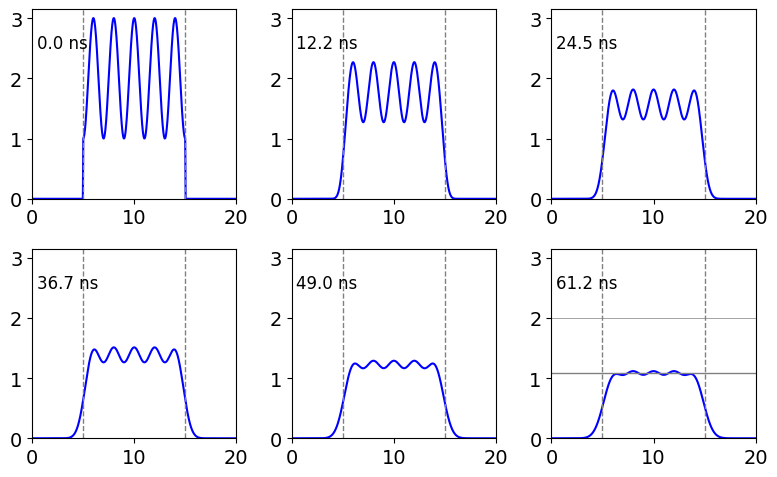

In [7]:
# Algorithm 13a.
# 1D diffusion of a sinusoidal population as in a transient grating experiment

fig = plt.figure(figsize=(8,5))
plt.rcParams.update({'font.size': 14})        # set font size for plots

ax = [fig.add_subplot(230 + i) for i in range(1,7)]  # make axes to plot

Lambda = (530e-9 /2)*np.sin(20*np.pi/360)*1e9 # 530 nm light grating wavelength in nm
w  =   20*Lambda                              # total calculation width as multiple of grating wavelength
nsteps = 5000

D  = 1e-8*1e18/1e9                            # diffusion coeff   m^2/s->1e18/1e9 nm^2/ns 
dx = 0.7                                      # step length nm
nx = int( w/dx )                              # total number of steps
dt = dx**2/D/4                                # time step in nanosec 
sigma = D*dt/dx**2                            # constants 

c0 = np.zeros(nx, dtype = float)              # make arrays 
c  = np.zeros(nx,dtype = float)
x  = np.linspace(0, w, nx)

tau = 100                                     # excited state lifetime,  in update_step
kk  = 1/tau                                   # used as - kk*dt*c0[1:-1] in update step
q   = int(5*Lambda/dx)                        # start grating q, and  nx-q stop grating
c00 = 2                                       # value when no grating just two lasers
for i in range(q,nx-q):
    c0[i] = c00 + np.cos(np.pi*x[i]/Lambda)   # initial sinusoidal profile  

#--------------------
def update_step(c0,c):     # Propagate with forward-difference in time, central-difference in space
    c[1:-1] = c0[1:-1] + sigma*(c0[2:] - 2*c0[1:-1] + c0[:-2])   - kk*dt*c0[1:-1]
    c[0]    = c[1]                            # Neumann condition   dc/dt=const
    c[nx-1] = c[nx-2]
    return c
#-------------------

tsteps = [i/10*nsteps for i in range(0,11,2)]    # plot at these timesteps

i = 0
for m in range(nsteps+1):
    c  = update_step(c0,c)
    c0 = c                     # make copy as starting data for next iteration
    if m in tsteps:            # plot only at these times
        ax[i].plot(x/Lambda,c,color='blue')
        ax[i].set_ylim([0,3.15])
        ax[i].set_xlim([0,w/Lambda])
        ax[i].text(20/Lambda,2.5,str('{:0.1f}'.format(m*dt))+' ns',fontsize=12)
        ax[i].axvline(5,linewidth=1, color='gray',linestyle='dashed')
        ax[i].axvline(15,linewidth=1, color='gray',linestyle='dashed')
        i=i+1
plt.axhline(c00,linewidth=0.5, color='grey')
plt.axhline(c00*np.exp(-m*dt/tau),linewidth=1, color='grey')
plt.tight_layout()
plt.show()

Figure 10 b. This plot shows the grating amplitude decreasing due to diffusion, the total amount of excited state present is also reduced by excited state decay. In the last frame the upper horizontal line shows the initial amount when all the grating has decayed assuming no excited state decay, and the lower line the amount left as a result of the excited state decay, in this example $\tau=100$. The signal that would be diffracted of this grating thus decays as diffusion occurs and as the excited state decays.
_____________________

## 4.12 2D diffusion in a plate.

We now use the integration scheme described at the start of this section but in two dimensions. The reason for using the simpler scheme is because the Crank-Nicholson scheme, described below, produces equations that are hard to solve in 2D and alternative, and complicated,  methods as described by Prest et al. (Numerical Recipes) are then used.  

The two-dimensional diffusion equation is

$$\frac{\partial U}{\partial t}=D\left(  \frac{\partial^2 U }{\partial x^2 }+\frac{\partial ^2U }{\partial y^2}\right) $$

where $U$ represents temperature or concentration as necessary. Since there no terms involving both $x$ and $y$ the two dimensions can be treated separately and this greatly simplifies the calculation. It is also assumed that the diffusion coefficient is the same in all directions and is constant as the temperature changes, which implies that any temperature change must be small.

A numerical solution on the domain of the unit square $0 \le x \lt 1,\;0\le y \lt 1$ approximates $U(x,y;t)$ by the discrete function $u^{j}_{i,k}$ where $x=i\Delta x, y=k\Delta y , t = j\Delta t$. If a unit square is not what is required then we suppose that $x$ and $y$ are fractions of the true dimensions and adjust the graphs plotted at the end as appropriate.  Applying a finite difference approximations yields

$$\frac{u^{(j+1)}_{i,k}- u^{j}_{i,k}}{Δt} =D\left( \frac{u^{j}_{i+1,k}- 2u^{j}_{i,k} + u^{j}_{i-1,k}}{\Delta x^2} +\frac{u^{j}_{i,k+1}- 2u^{j}_{i,k} + u^{j}_{i,k-1}}{\Delta y^2}\right) $$

and hence time step $j+1, u^{(j+1)}_{i,k}$ may be calculated from its state at time step $j, u^{j}_{i,k}$ via this equation by factoring terms as was done in one dimension

$$u^{(j+1)}_{i,k}= u^j_{i,k}+\frac{D\Delta t}{\Delta x^2} \left( \cdots \right)$$

Consider the diffusion equation applied to a plate initially at temperature $T_0$ apart from a disc of a specified size which is at temperature $T_1$. We suppose that the edges of the plate are held fixed at $T_0$. Experimentally this might correspond to heating a spot in a thin sample with pulse from a laser and then observing the change in temperature. A related experiment is to ablate a region in a cell membrane into which a protein of other molecule is labelled with a fluorescent dye. The ablation is such that it bleaches the dye without appreciably heating the sample, and then the re-appearance of the fluorescence is monitored after the ablating laser pulse has ended. This measurement produces the diffusion coefficient of the labelled molecules and  is  what occurs in a FRAP (Fluorescence Recovery after Photo-bleaching) experiment. 

The following code applies the above formula to follow the evolution of the temperature of a plate. The initial spot is heated with respect to the rest of the plate. The code used is similar to that given above in the subroutine 'update_step'. 

It can be shown that the maximum time step, $\Delta t$ that we can allow without the process becoming unstable is

$$\displaystyle \Delta t=\frac{(\Delta x\Delta y)^2}{2D(\Delta x^2+\Delta y^2)}$$

The Neumann initial condition is used and ensures that no heat is lost, which can be checked by summing the total temperature of the plate at different times.  The images clearly show how the energy deposited into the central spot diffuses into the surroundings as time passes. Calculating the temperature  at the centre of the disc (or at any other position) indicates how the energy spreads with time.  

The average distance heat or molecules diffuse in time $t$ is given by 

$$\displaystyle \langle r\rangle =\sqrt{2nDt}$$

in dimension $n$ thus $\langle r\rangle =\sqrt{4Dt}$ in this example. The rate of increase in $\langle r\rangle$ is 

$$\displaystyle \frac{d}{dt}\langle r\rangle =\sqrt{\frac{D}{t}}$$

These average distances are shown on the plots and show how the radial distance diffused slows down with increasing time.

dx  0.002 dy  0.002 dt  1.25e-05
spot radius 50.0  micron
maxtime (ms) 25
start calculation
time steps 0


time steps 400


time steps 800


time steps 1200


time steps 1600


time steps 2000


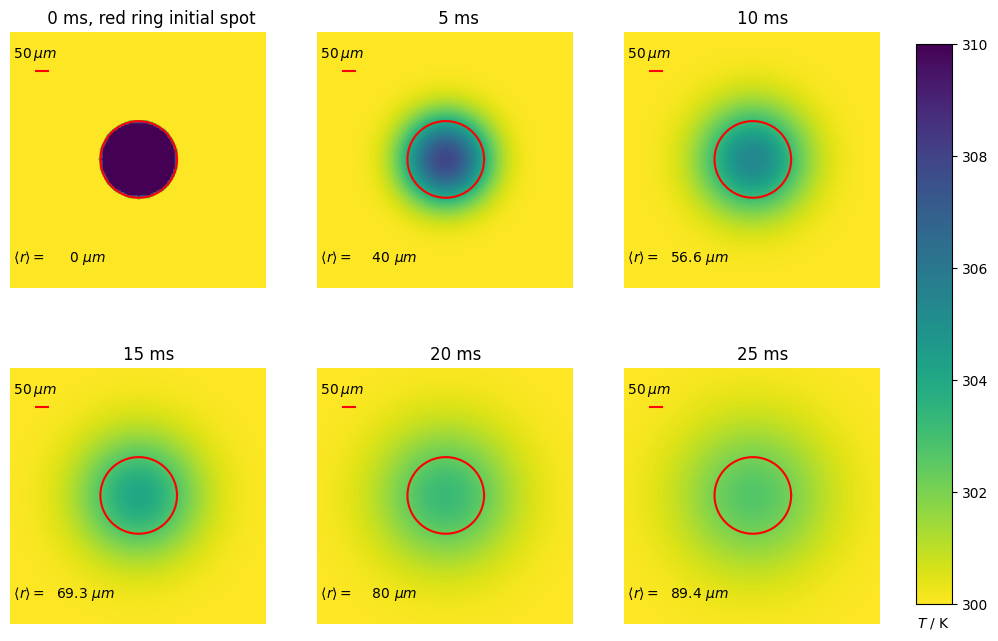

In [8]:
# Algorithm 13b; 2D diffusion in a plate

fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 10})  # set font size for plots

w, h  = 1.0,1.0               #  keep fixed plate size unity mm.
dx,dy = 0.002, 0.002          # intervals in x-, y- directions, mm
D     = 0.08                  # 0.08 mm^2/s typical of organic liquid,  Thermal diffusivity

Tcool, Thot = 300, 310        # plate temperaqture and init temp in heated area
nsteps = 2000
nx, ny = int(w/dx), int(h/dy)
dx2 = dx**2
dy2 = dy**2
dt  = dx2 * dy2 / (2 * D * (dx2 + dy2))  # time in seconds 
print('{:s} {:g} {:s} {:g} {:s} {:g}'.format('dx ', dx,'dy ',dy,'dt ',dt) )
alphax = D*dt/dx2
alphay = D*dt/dy2

u0 = Tcool * np.ones((nx, ny),dtype = float)       # initial values everywhere
u  = np.zeros((nx,ny),dtype = float)
p  = np.zeros( nsteps+1, dtype=float)

# Initial conditions - ring of inner radius r (mm), width dr centred at (cx,cy) (mm), r > dx
r, cx, cy = 0.05*w, 0.5*w, 0.5*h
r2 = r**2
print('spot radius',r*1000,' micron')

#--------------------
def hot_spot(u0,Thot):                     # check where to put hot molecules
    for i in range(nx):
        for j in range(ny):
            p2 = (i*dx-cx)**2 + (j*dy-cy)**2  # in mm
            if p2 <= r2:
                u0[i,j] = Thot
    return u0        
#-------------------
def aring(r,cx,cy):                        # returns list of x and y coords of circle in mm
    w = np.linspace(0,2*np.pi,360)
    x = cx + r*np.cos(w)
    y = cy + r*np.sin(w)
    return x,y  # in mm
            
#--------------------
def update_step2D(u0):                     # Neumann conditions added at end
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + alphax*(u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1]) \
                                   + alphay*(u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2]) 
    u[0,1:ny-2]    = u[1,1:ny-2]           # Neumann boundary condition
    u[nx-1,1:ny-2] = u[nx-2,1:ny-2]
    u[1:nx-2,0]    = u[1:nx-2,1]
    u[1:nx-2,ny-1] = u[1:nx-2,ny-2]
    
    return u
#-------------------

print('{:s} {:g}'.format( 'maxtime (ms)', nsteps*dt*1000 ) )
xring, yring = aring( r, cx, cy )          # coords of circle radius r 
u0 = hot_spot( u0, Thot )                  # make initial hot spot
mfig = [0, nsteps*0.2, nsteps*0.4, nsteps*0.6, nsteps*0.8, nsteps] # plot at these timesteps
fignum = 0
print('start calculation')
for m in range(nsteps+1):

    u  = update_step2D(u0)
    u0 = u                                 #  make copy as starting data for next iteration
    p[m] = u[nx//2,ny//2]
    if m in mfig:                          # plot only at these times
        print('time steps', m)
        fignum = fignum + 1
        ax = fig.add_subplot(230 + fignum)
        im = ax.imshow(u, cmap = plt.get_cmap('viridis_r') , vmin = Tcool, vmax = Thot)
        ax.set_axis_off()
        ax.set_aspect(1)
        ax.set_xlim([nx//3,nx*2//3])  # only show part of plot 1/3 to 2/3 
        ax.set_ylim([ny//3,ny*2//3])
        if fignum == 1:
            ax.set_title('{:6.3g} {:s}'.format(m*dt*1000,'ms, red ring initial spot')  )
        else:
            ax.set_title('{:6.3g} {:s}'.format(m*dt*1000,'ms')  )
            
        ax.plot([1.1*nx//3, 1.1*nx//3 + (0.05/w)*nx//3],[1.85*ny//3, 1.85*ny//3], color='red')   # plot bar size 50 micron
        ax.text(nx//3, ny*1.9//3, str( r'$\;50\,\mu m$') )
        ax.plot(xring*nx, yring*nx, color='red')
        av_r = np.sqrt(4*D*1e-6*m*dt)                # average distance diffused at this time ( metres)
        ax.text(nx//3,1.1*ny//3,r'$\;\langle r\rangle =$'+str('{:6.3g}'.format(av_r*1e6))+r' $\mu m$')
        pass

fig.subplots_adjust(right = 0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad = 5)
fig.colorbar(im, cax = cbar_ax)

plt.show()

## 4.13 Crank-Nicholson Method. The time-dependent Schroedinger equation

The best method with which to perform 1D diffusion type calculations and the 1D time-dependent Schroedinger equation, is, according to Prest (Numerical Recipes), the Crank-Nicholson approach as it is second order in time and space. This method is still, however, subject to numerical instability as are all such methods. This method is computationally a little more complex than the approach in section 4.11. The method uses the stencil shown below and is based on using the trapezoidal rule to perform the integration.

![Drawing](num-methods-fig10c.png)
     
Figure 10c. Stencil for the Crank-Nicholson calculation. The top three values labelled with $j+1$ are unknown.
______

The method is explained  with the time-dependent Schroedinger equation. 

$$\displaystyle i\hbar \frac{\partial \psi}{\partial t}=-\frac{\hbar^2}{2m}\frac{\partial^2 \psi}{\partial x^2}+V(x)\psi$$

where $\psi$ is a function of time and space, or $x$ and $t$. Atomic units are used which means that $\hbar=m=1$ where $m$ is the mass of the electron.  The unit of distance is $a_0$, the Bohr atom radius, ($a_0=5.21\times 10^{-11}$ m) and the unit of time is $\hbar/E_H=2.419\times 10^{-17}$ s where $E_H$ is the Hartree = $4.3597\times 10^{-18}$ J which is twice the ionisation energy of an hydrogen atom. If we wish to do the calculation with a different mass all that has to happen is to change the time, energy etc. at the end of the calculation when changing back to SI units. 

The atomic units simplify the Schroedinger equation to

$$\displaystyle i \frac{\partial \psi}{\partial t}=-\frac{1}{2}\frac{\partial^2 \psi}{\partial x^2}+V\psi$$

The potential energy $V$ depends only on a spatial coordinate. Expanding in a manner similar to that of eqn. 31b except that a better approximation is made to the second derivative, which is the average of the past and future time points. The spatial grid has index $k$, time time grid $j$ and after dividing by $i=\sqrt{-1}$,

$$\displaystyle \frac{\psi_k^{j+1}-\psi_k^j}{\Delta t}=i\frac{1}{2(\Delta x)^2}\bigg(\left(\psi_{k+1}^{j+1}-2\psi_k^{j+1}+\psi_{k-1}^{j+1}\right) + \left(\psi_{k+1}^j-2\psi_k^j+\psi_{k-1}^j  \right )\bigg)-i V_k(\psi_k^{j+1}+\psi_k^j)$$

Expanding on a grid means that the end points effectively form an infinitely high barrier, i.e. the calculation takes place within a square well or 'particle in a box' potential so normally the calculation is stopped before the ends are reached. If not you do this you should observe the wavepacket being reflected off the wall and then its continued motion. 

To solve the equation it is far easier to convert it into matrix form. This means calculating all the spatial dimension terms before calculating in time. Its not so obvious, but it becomes clear later on, that it helps to rewrite the equations by collecting terms in $\psi^{j+1}$ and in $\psi^j$ as

$$\displaystyle - \sigma\psi_{k-1}^{j+1}+(1+2\sigma)\psi_k^{j+1}- \sigma\psi_{k+1}^{j+1}+i V_k\psi_k^{j+1}\Delta t = \sigma \psi_{k-1}^{j}+(1-2\sigma)\psi_k^{j}+ \sigma\psi_{k+1}^{j} -i V_k\psi_k^j\Delta t  \qquad\tag{31c}$$

where $\sigma=i\Delta t/(2(\Delta x)^2)$. The tri-diagonal form the equations have can be seen in the $k-1,\, k,\,k+1$ terms on either side of the equation. Thus, given the initial wavefunction/wavepacket and the boundary conditions that $\psi\to 0 $ at $x\to \pm \infty$, $\psi$ can be calculated at later times.

To solve the equations it is necessary to iterate in time and at each time solve the equations above in spatial coordinates. The best way to do this is to solve for all $x$ at a given time then increment time and repeat. Although it looks very complex, the simplest approach is to transform the equations into matrix form. The $\psi$ (eqn 31c) can be put into matrix form by defining a column vector,

$$\displaystyle \mathbf{P}^J=\left[ \psi_0^j,\psi_1^j\cdots \psi_{m-1}^j \right]^T$$

and then the 'tri-diagonal' matrices for the coefficients in eqn. 31c are, 

$$\small\left(\begin{bmatrix}
1+2\sigma & -\sigma & 0 & 0 &\dots\\
-\sigma & 1+2\sigma & -\sigma &0 &\\
& & \vdots& & &\\
 & \cdots &-\sigma & 1+2\sigma &-\sigma \\
& & \cdots &-\sigma & 1+2\sigma 
\end{bmatrix} +
\begin{bmatrix}
iV_0\Delta t&0&\cdots\\
0 & V_1\Delta t & 0 \\
& \vdots\\
\dots & 0 & iV_{m-1}\Delta t
\end{bmatrix}\right)
\begin{bmatrix}
\psi_0^{j+1}\\
\psi_1^{j+1}\\
\vdots\\
\psi_{m-1}^{j+1}
\end{bmatrix} \\= 
\left(\begin{bmatrix}
1-2\sigma & +\sigma & 0 & 0 & \dots\\
+\sigma & 1-2\sigma & +\sigma &0 &   \\
&  \vdots& & &\\
 & \cdots &+\sigma & 1-2\sigma &+\sigma \\
&  &\cdots &+\sigma & 1-2\sigma 
\end{bmatrix} -
\begin{bmatrix}
iV_0\Delta t&0&\cdots\\
0 & iV_1\Delta t & 0 \\
& \vdots\\
\dots & 0 & iV_{m-1}\Delta t
\end{bmatrix}\right)
\begin{bmatrix}
\psi_0^{j}\\
\psi_1^{j}\\
\vdots\\
\psi_{m-1}^{}
\end{bmatrix}
$$

and in matrix notation this is 

$$\displaystyle  \mathbf{(A'+V) P}^{j+1} = \mathbf{(B'-V) P}^{j} $$ 

where the matrix of the potential is diagonal and can therefore be added to the diagonals of the tri-diagonal. Letting $\mathbf{A'+V\to A}$ and similarly $\mathbf {B'-V\to B}$, multiplying both sides by $\mathbf{A^{-1}}$ gives 

$$\displaystyle  \mathbf{P}^{j+1} = \mathbf{A^{-1}}\mathbf{B P}^{j}$$

thus in the iteration scheme the $\mathbf A$ and $\mathbf{B}$ matrices needs to be inverted once only, as they contain only constant terms. This saves considerable effort. Time in the numerical model has index $j$ so once initial values are determined, a loop with the matrix equation can be performed. As $\mathbf{A}^{-1}$ and $\mathbf{B}$ are constant in time they are only evaluated once and outside the time loop. Only $\mathbf{P}$ vectors vary in time, we could write the last equation as 

$$\displaystyle  \mathbf{P}^{new} = \mathbf{A^{-1}}\mathbf{B P}^{old}   \qquad\tag{31d}$$

and this equation is iterated as

$P^{old}=\text{initial wavepacket}\\
\text{loop over time}\\
\quad{P}^{new} = {A^{-1}}{B P}^{old}\\
\quad  P^{old} = {P^{new}}\\
\quad\text{save }P^{new}\\
\text{repeat}$

### **(i) Wavepacket motion**

The following calculation illustrates a particle moving inside an infinite square-well potential and encountering a barrier. Because we are dealing with an atomic sized particle this is represented as a wavepacket. Depending on the initial conditions, i.e., the height and thickness of the barrier and its momentum the wavepacket either may reflect from the barrier, pass completely through (quantum tunnelling) or be split into two parts, one part being reflected the other tunnelling through.  The calculation's parameters are set up the illustrate the latter process. 

The wavepacket used has the form of a plane wave multiplied by a gaussian envelope and has the normalised form,

$$\displaystyle W(x,t) = \frac{1}{(2\pi\sigma^2)^{1/4}}e^{-x^2/(4 \sigma^2) }e^{ip_0x}$$ 

where  $p_0$ the initial momentum. Notice that $W(x,t)$ is a complex quantity, we usually plot it as the probability distribution $W^*W$ where * indicated the complex conjugate. Mathematically normalisation means that $\int_{-\infty}^\infty W^*Wdx=1$ and physically is equivalent to conservation of mass since the particle always exists somewhere. 

To form a wavepacket the particle must have a range of momenta, which also means a range of energies, so it cannot be in a single eigenstate and, because of the uncertainty principle, it must also occupy one of a range of positions. Experimentally, wavepackets of vibrational levels are made by exciting a molecule with a laser pulse of short (femtosecond) duration. 

In our calculation the wavepacket $W(x,t)$ is in its *minimum-uncertainty state* in which the product $\Delta p\Delta x =\hbar/2$, i.e. the Heisenberg uncertainty is obeyed. Thus the particle represented by this wavepacket is localised at time $t=0$ within space $\Delta x$ and momenta $\Delta p$. If this were a molecule, proton or electron the particle does not itself 'spread out' i.e. a particle always has a well defined size (and shape if a molecule), but to detect it the detector will have to be large enough to cover its whole distribution of positions. 

The uncertainty in position is $\delta x=\sigma$ and in momentum $\Delta p=\hbar/2\sigma$.  The momentum is also defined as $p=\hbar k_0$ where $k_0$ is the wavevector and the energy is given by $E=(\hbar k_0)^2/2m$. As time progresses the wavepacket moves and its width increases. Initially the fwhm. of the gaussian shape is $2\sqrt{2\ln(2)}$. Its group velocity is 

$$\displaystyle v_g=\frac{dE}{dp}=\frac{\hbar k}{m}$$

which is the speed at which the envelope moves and is the velocity of a classical particle. Its phase velocity is 

$$\displaystyle v_{ph}=\frac{E}{p}=\frac{\hbar k}{2m}$$

The phase velocity is the speed at which the peak of the wave inside the envelope moves. This can be viewed if the real or imaginary part of  $W$ is plotted and has spatial frequency $p_0$. The energy of the particle is $E=\hbar\omega$ where $\omega$ is the wave frequency in radians/sec ($\omega=2\pi\nu$ where $\nu$ is the frequency in s$^{-1}$). The energy is also $p^2/2m$ so that $k^2=2m\omega/\hbar$, so that $k$ is proportional to frequency.

As the wavepacket moves, in the absence of a barrier, its overall shape remains the same but its width spreads and amplitude decreases, this is called dispersion. It is simpler to look at the probability distribution $|W|^2$ rather than the wavepacket itself. This is  

$$\displaystyle p(x,t)=|W(x,t)|^2 \sim \exp\left(-\frac{\left(x-\hbar k_0 t/m\right)^2}{2\sigma_t^2}\right),\qquad \sigma_t^2=\sigma^2+\frac{\hbar^2 t^2}{4m^2\sigma^2}$$

where $\sigma_t$ shows how the wavepacket width spreads in time while moving with velocity $\hbar k_0/m$. Its amplitude must decreases because the total probability is unity at all times and over the whole range of positions.  (At negative times the wavepacket compresses to its minimum value at $t=0$ and then expands as positive time).

In the following calculation we use atomic units, $\hbar=m=1$ and allow the wavepacket to collide with a thin barrier, a very hard calculation if not done numerically. You can see that as the wavepacket moves its amplitude becomes smaller and its width increases just as described above. When the barrier is reached, some tunnelling and some reflection occurs. The reflected part shows rapid oscillations due to interference of the incoming and out going  waves. Recall that the wavepacket we show is only the envelope $W^*W$, $W$ itself contains $e^{ik_0x}$ which is also $\cos(k_0x)+i\sin(k_0x)$ so clearly has wavelike nature. It is this that interferes and caused huge oscillations in $W^*W$ as shown in the calculation.

In [9]:
# Algorithm 13c Crank-Nicholson method.
# 1D time dependent Schroedinger eqn with potential V. 
# Calculation using Atomic Units. hbar  = m = 1, m is the mass of electron

#-------------------------
def barrier(nx,V0,w):                         # barrier is a rectangle -w to w
    V  = np.zeros(nx)
    x = np.linspace(0,nx,nx)
    mask = (x >= nx//2-w) & (x <= nx//2+w)
    V = np.where(mask, V0, 0)
    return V
#-------------------------

def wavepacket(nx,x0,sig,k0):                 # Gaussian wavepacket
    wp  = np.zeros(nx,dtype = complex) 
    wp[:] = np.exp(-(x[:]-x0)**2/(4*sig**2))*np.exp(1j*k0*x[:])  
    return wp
#--------------------------------------

def make_tri_matrix(J,sig):                   # tri-diagonal matrix
    ss = 1
    M  = np.zeros([J,J],dtype = complex)
    M[0,0] = 1 + sig*ss
    M[0,1] = -sig*ss
    for i in range(1,J-1):
        M[i,i-1] = -sig
        M[i,i]   = 1 + 2*sig
        M[i,i+1] = -sig
        pass
    M[J-1,J-2] =  -sig*ss
    M[J-1,J-1] = 1 + sig*ss
        
    return M

#-------------------------
def V_diag_matrix(J):                          # poetntial energy    
    
    M  = np.zeros([J,J], dtype = complex)
    for i in range(J):
        M[i,i] = 1j*V[i]*dt
    return M      
#-------------------------

def updatePsi(p0,pnew):                             # update all x at new time t+1
    
    pnew =  invAmat @ (Bmat @ p0 )                  # Crank-Nicholson  
    pnew[0] = pnew[1]                               # boundary
    pnew[-1]= pnew[-2]
    nn = np.sqrt(dx*sum(np.conj(pnew[:])*pnew[:]))  # normalise
    pnew[:] = pnew[:]/nn
    return pnew
#--------------------------

def inits():                                         # initial values
    nt = 1500        # number time points (integer)
    dt = 0.125       # can be tricky to get this right.
    nx = 2001        # num grid x points. Reduce this number to 500 to make the calculation faster
    Lb = 200         # grid end  (integer)
    La = -200        # grid start (integer)
    V0 = 0.25        # barrier height
    w  = 3           # half barrier width (integer)
    k0 = 1           # wavepacket momentum
    sig= 5           # wavepacket width sigma
    x0 = -100        # initial wave packet centre
    
    return nx,nt,dt,k0,La,Lb,V0,w,sig,x0
#--------------------------

nx,nt,dt,k0,La,Lb,V0,w,sig,x0 = inits()

x  = np.linspace(La,Lb,nx)                # x range 
dx = x[1] - x[0]

psi0 = np.zeros(nx,dtype = complex)       # initial wavefunction/wavepacket
psi  = np.zeros([nt,nx],dtype = complex ) # final results
p    = np.zeros(nx,dtype = complex)       # array to hold intermediate values

psi0 = wavepacket(nx,x0,sig,k0)           # make wavepacket
psi0 = psi0/sum(dx*np.abs(psi0[:]))       # normalise wavepacket

print('{:s}{:g} {:s} {:g} {:s} {:g}'\
      .format('dx = ',dx,'dt = ',dt,'dt/dx^2 = ',dt/dx**2) )

sig = 0.25*1j*dt/dx**2                    # i hbar/(2m)dt/dx^2   constants
V = barrier(nx,V0,w)                      # make barrier

Amat    = make_tri_matrix(nx, sig)  + V_diag_matrix(nx)  # start Crank-Nicholson
Bmat    = make_tri_matrix(nx,-sig)  - V_diag_matrix(nx)
invAmat = linalg.inv(Amat)
    
for t in range(0,nt-1):                   # main calculation here, time loop. 
    p = updatePsi(psi0,p)
    psi0 = p
    psi[t+1,:] = psi0[:]
    pass

print('finished calculation')

dx = 0.2 dt =  0.125 dt/dx^2 =  3.125


finished calculation


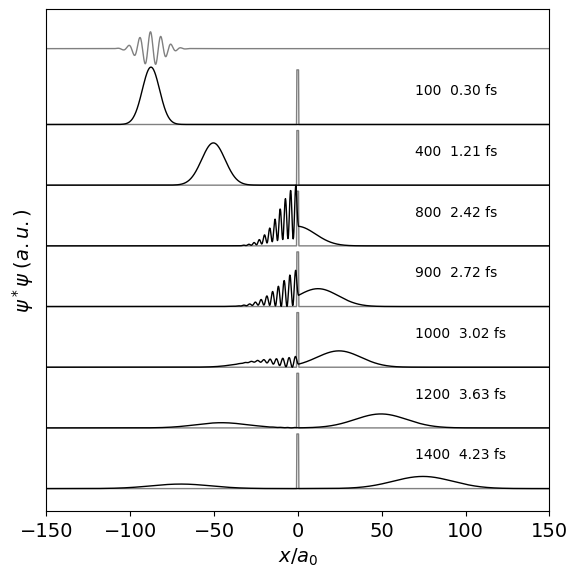

In [10]:
fig2 = plt.figure(figsize = (6,6))
plt.rcParams.update({'font.size': 14})        # set font size for plots

f0 = dt*2.41888e-17*1e15                      # atomic units to femtoseconds
mx = np.abs(np.amax(np.conj(psi)*psi ) )      # global maximum

j = 0
plt.plot(x, 7.25-j+np.real(psi[100,:]),color='grey', linewidth=1)
for i in [100,400,800,900,1000,1200,1400] :   # I choose to plot at these time points
    plt.plot(x,6-j+0.9*V/V0,color='grey',linewidth=1)
    plt.plot(x,6-j + np.real(np.conj(psi[i,:])*psi[i,:]/mx) ,color='black',linewidth=1)
    
    fmt='{:d}{:6.2f}{:s}'.format(i,i*f0,' fs')
    plt.text(0.35*Lb,6-j+0.5,fmt,fontsize=10)
    j=j+1
    pass

plt.xlabel(r'$x/a_0$')
plt.ylabel(r'$\psi^*\psi\; (a.u.)$')
plt.xlim([-150,150])
plt.yticks([])
plt.tight_layout()
plt.show()

Figure 10 d. The figure above shows the probability $\psi^*\psi$ vs $x$ at different times. The scattering of the wavepacket and its subsequent re-phasing is clear. The $\displaystyle e^{ik_0x}$ term of the wavepacket generates high spatial frequencies which are observed when the wavepacket is dephased at the barrier. Subsequently these reform and a smooth wavepacket is reproduced.  The probability is scaled to the maximum value at any time, the area is the same in each plot as the wavepacket is normalised.  The real part of the wavepacket is show above its envelope. This shows oscillatory behaviour due to the  $e^{ik_0x}$ term. 

### **(ii) Wavepacket Animation**

The following script produces an animation of the wavepacket motion. The axes and calculation are the same as the figure above.

In [11]:
import ipywidgets.widgets  as wgt
from ipywidgets import interact, interactive, fixed, interact_manual,VBox,HBox,Layout,HTML,Text
from IPython.display import display

plt.rcParams.update({'font.size': 14})                 # set font size for plots
 
mx = np.real(np.amax(np.conj(np.conj(psi)*psi ) )  )   # global max

def wpacket(k):
    fmtt = '{:s} {:4.2f} {:s} {:d} '.format('t = ', ((k+1)*f0),'fs # ',(k+1)) 
    plt.title(fmtt)
    plt.plot(x,V/V0,color='red',zorder=-1,linewidth=1)
    plt.xlabel(r'$x/ a_0$')
    plt.ylabel(r'$\psi^*\psi$')
    plt.ylim([0,1.1])
    temp =  np.real(np.conj(psi[k,:])*psi[k,:] )/mx
    plt.plot(x,temp[:],color='black', linewidth=0.5)
    plt.show()
    pass

f02 = wgt.HTML( value="*** Push triangle to start, must push square to reset before restart *** ")
display(f02)
f01 = wgt.interact(wpacket,k = wgt.Play(min=0,max=nt-1,step=20))  # step changes speed
display(f01)

HTML(value='*** Push triangle to start, must push square to reset before restart *** ')

interactive(children=(Play(value=0, description='k', max=1499, step=20), Output()), _dom_classes=('widget-inte…

<function __main__.wpacket(k)>